In [1]:
# Gain modulation RNN with oja learning on output matrix
# Loss comparison with only BP, oja, Hebb
import numpy as np
import sys
sys.path.append("..")
from rnn import RNN
import matplotlib.pyplot as plt
import json
import torch

## Loading Trained Weights

In [2]:
with open('../weights/sinwave_liquid_128_nodes/weight_history.json') as f:
    weight_history = json.load(f)

In [3]:
weight_history.keys()

dict_keys(['trained gain', 'trained shift', 'trained weights', 'connectivity matrix', 'input weights', 'output weights', 'losses'])

In [4]:
gains = np.array(weight_history['trained gain'])
shifts = np.array(weight_history['trained shift'])
weight_matrix = np.array(weight_history['trained weights'])
connectivity_matrix = np.array(weight_history['connectivity matrix'])
input_weights = np.array(weight_history['input weights'])
output_weight_matrix = np.array(weight_history['output weights'])
losses = np.array(weight_history['losses'])

## Defining Network

In [5]:
time_constant = 100 #ms
timestep = 10 #ms
time = 3000 #ms
num_inputs = 1
num_nodes = 128
init_activations = np.zeros((num_nodes, 1))

network = RNN(weight_matrix, connectivity_matrix, init_activations, gains, shifts, output_weight_matrix, 
                time_constant = time_constant, timestep = timestep)

100%|██████████| 300/300 [00:00<00:00, 12139.22it/s]


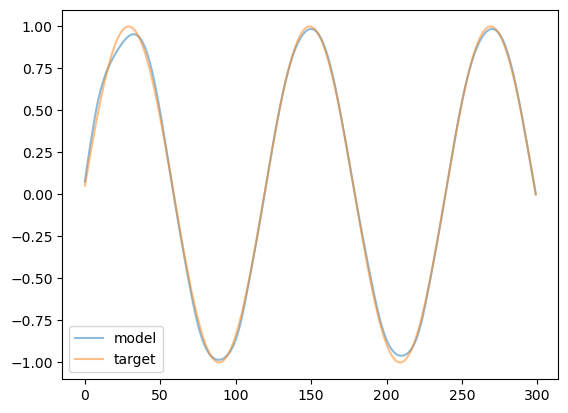

In [6]:
time_points = np.arange(300).reshape(-1, 1)
# inputs = (1 + np.sin(time_points/60*np.pi))/2
# targets = (1 + np.sin((time_points+1)/60*np.pi))/2
inputs = np.sin(time_points/60*np.pi)
targets = np.sin((time_points+1)/60*np.pi)
inputs = inputs.reshape(-1, 1)
targets = targets.reshape(-1, 1)

outputs, activations = network.simulate(time, torch.tensor(inputs).float(), input_weights)
fig, ax = plt.subplots()
plt.plot(time_points, outputs.detach().numpy(), alpha=0.5, label='model')
# plt.plot(time_points, inputs)
plt.plot(time_points, targets, alpha=0.5, label='target')
plt.legend()
plt.savefig("fig/sin_liquid_train.png")

100%|██████████| 300/300 [00:00<00:00, 11676.14it/s]


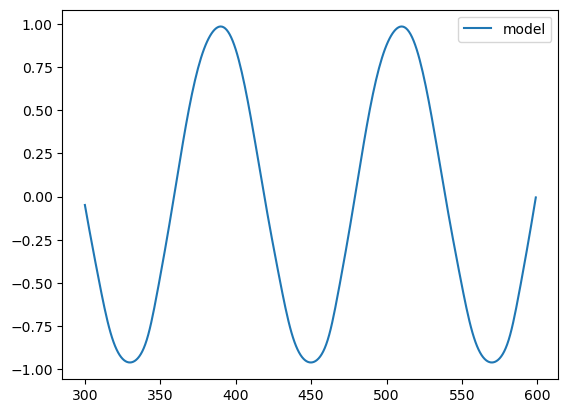

In [7]:
time_pred = 3000

time_points_pred = np.arange(300,600).reshape(-1, 1)
# inputs_pred = (1 + np.sin(time_points_pred/60*np.pi))/2
inputs_pred = np.sin(time_points_pred/60*np.pi)

outputs_pred, activations_pred = network.simulate(time_pred, torch.tensor(inputs_pred).float(), input_weights)
fig, ax = plt.subplots()
plt.plot(time_points_pred, outputs_pred.detach().numpy(), label='model')
plt.legend()
plt.savefig("fig/sin_liquid_pred.png")

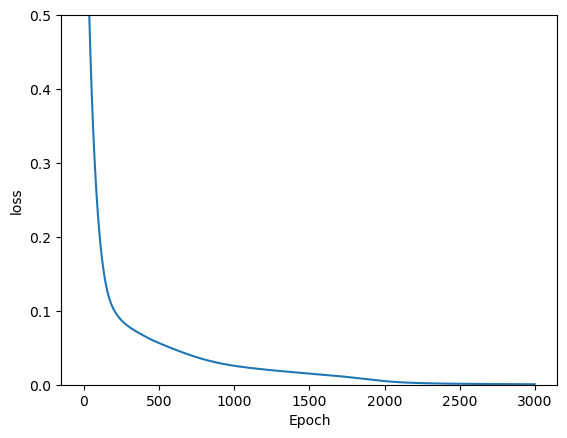

In [8]:
plt.plot(np.arange(len(losses)), losses)
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.ylim([0,0.5])
plt.savefig("fig/sin_liquid_loss.png")

### Loss comparison

In [9]:
with open('../weights/sinwave_BP_128_nodes/weight_history.json') as f:
    weight_history1 = json.load(f)
losses_norm = np.array(weight_history1['losses'])

In [10]:
with open('../weights/sinwave_hebb_128_nodes/weight_history.json') as f:
    weight_history1 = json.load(f)
losses_hebb = np.array(weight_history1['losses'])

In [11]:
with open('../weights/sinwave_oja_128_nodes/weight_history.json') as f:
    weight_history1 = json.load(f)
losses_oja = np.array(weight_history1['losses'])

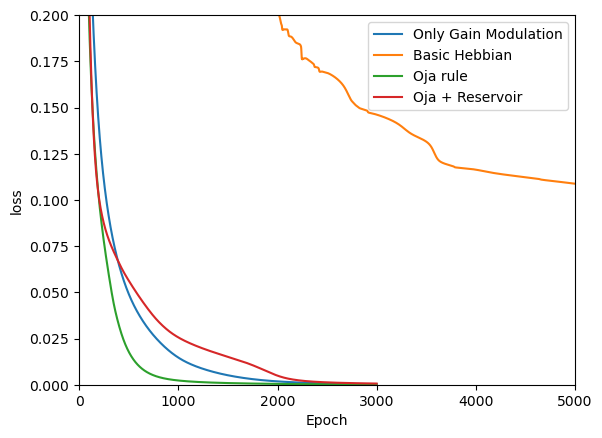

In [12]:
plt.plot(np.arange(len(losses_norm)), losses_norm, label='Only Gain Modulation')
plt.plot(np.arange(len(losses_hebb)), losses_hebb, label='Basic Hebbian')
plt.plot(np.arange(len(losses_oja)), losses_oja, label='Oja rule')
plt.plot(np.arange(len(losses)), losses, label='Oja + Reservoir')
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.ylim([0,0.2])
plt.xlim([0,5000])
# plt.xscale('log', basex=2)
plt.legend()
plt.savefig("fig/sin_loss_compare.png")